# Weather Trend Forecasting

## Our Goals and Aspirations for This Project

Accurate weather forecasting is crucial for various sectors, from agriculture and transportation to disaster preparedness and renewable energy. This project aims to leverage the power of machine learning to improve weather prediction capabilities using the rich dataset provided by the World Weather Repository.

## The Roadmap

Every ML project begins with the following pipeline in mind:
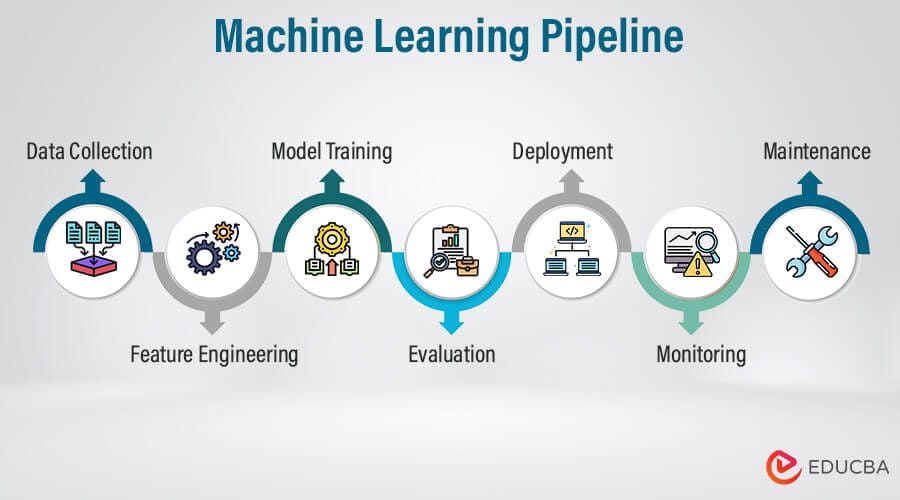![image.png](attachment:image.png)
It is not a requisite for us to think about these steps actively as we try to build our project but following them in an orderly manner just saves us from a world of pain when we try to really work with our data and have it speak to us.You'll understand better when we start cleaning our data, visualizing it, observing trends, and weeding out the features that do not help us with our predictions.

Let's get into the building.

## Libraries

Libraries are the lifeblood of our code. Importing the necessary ones allows us to call on the resources created by the super smart people who did the math so we wouldn't have to:

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import folium
import json
import requests

In [3]:
# Grabbing data
data=pd.read_csv('GlobalWeatherRepository.csv')
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


## Data Cleaning and Feature Engineering: Formatting the Data for Our Purposes

Data cleaning usually consists of things like, dealing with null values, repetitive values, outliers, etc, and standardizing certain categorical variables into numeric data so our models can use all those yummy numbers. This is super important and I'll explain why as we tackle them.

In [4]:
# Dataset structure
print(f'Dataset info: {data.info()}')
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29706 entries, 0 to 29705
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       29706 non-null  object 
 1   location_name                 29706 non-null  object 
 2   latitude                      29706 non-null  float64
 3   longitude                     29706 non-null  float64
 4   timezone                      29706 non-null  object 
 5   last_updated_epoch            29706 non-null  int64  
 6   last_updated                  29706 non-null  object 
 7   temperature_celsius           29706 non-null  float64
 8   temperature_fahrenheit        29706 non-null  float64
 9   condition_text                29706 non-null  object 
 10  wind_mph                      29706 non-null  float64
 11  wind_kph                      29706 non-null  float64
 12  wind_degree                   29706 non-null  int64  
 13  w

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


This data set is very rigorously maintained, and that is why we see that there are no null values. Null values just represent the absence of data in a specific field or cell. "NaN" is a type of null value that stands for "Not a Number". This generated, for example, through the division of a number by 0. There is no way to represent such a value and so "NaN" is enough.

Real world data tends to be full of holes like that but thankfully for us we will not have to deal with that for this project.

In [5]:
data_new = data.copy()
data_new['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Madagascar', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Comoros',
       'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Swaziland', 'Ethiopia', 'Fiji Islands', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau

In [6]:
Wrong_Countries = ['USA United States of America', 'كولومبيا', 'Malásia', 'Гватемала', 'Турция',
                  'Польша', 'Mexique', 'Polônia', 'Marrocos', 'Турция','Saudi Arabien', 'Südkorea', 'Bélgica', 'Turkménistan',
                   '火鸡', 'Jemen', 'Südkorea','Inde', 'Estonie', 'Letonia', 'Saint-Vincent-et-les-Grenadines']
data_new[data_new['country'].isin(Wrong_Countries)]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
7998,USA United States of America,Moroni,39.53,-111.59,America/Denver,1719321300,2024-06-25 07:15,18.2,64.7,Sunny,...,4.8,8.9,1,1,06:01 AM,08:58 PM,No moonrise,09:47 AM,Waning Gibbous,89
8023,USA United States of America,Grenada,33.78,-89.81,America/Chicago,1719321300,2024-06-25 08:15,28.2,82.8,Sunny,...,6.1,7.0,1,1,05:50 AM,08:14 PM,11:32 PM,09:28 AM,Waning Gibbous,89
8083,USA United States of America,Palau,7.50,134.57,Pacific/Palau,1719321300,2024-06-25 22:15,27.2,81.0,Light rain shower,...,0.5,0.9,1,1,05:48 AM,06:21 PM,09:29 PM,08:37 AM,Waning Gibbous,89
11474,Malásia,Ivory Ivory Ban,4.63,118.37,Asia/Kuching,1720875600,2024-07-13 21:00,24.3,75.7,Light rain shower,...,1.8,2.3,1,1,06:01 AM,06:23 PM,11:28 AM,11:43 PM,First Quarter,41
11484,كولومبيا,Costa Rica,6.43,-70.92,America/Bogota,1720875600,2024-07-13 08:00,23.1,73.5,Mist,...,0.5,0.5,1,1,05:23 AM,06:02 PM,11:25 AM,11:30 PM,First Quarter,41
11492,Estonie,Tallinn,59.43,24.73,Europe/Tallinn,1720875600,2024-07-13 16:00,23.3,73.9,Partly cloudy,...,17.6,19.0,2,2,04:27 AM,10:26 PM,01:40 PM,12:05 AM,First Quarter,41
11504,Гватемала,New Guatemala,14.62,-90.53,America/Guatemala,1720875600,2024-07-13 07:00,15.9,60.6,Mist,...,40.8,68.8,3,4,05:41 AM,06:35 PM,11:54 AM,11:52 PM,First Quarter,41
11512,Inde,New Delhi,28.60,77.20,Asia/Kolkata,1720875600,2024-07-13 18:30,31.2,88.2,Mist,...,34.6,63.5,2,3,05:33 AM,07:22 PM,11:59 AM,11:45 PM,First Quarter,41
11525,Letonia,Riga,56.95,24.10,Europe/Riga,1720875600,2024-07-13 16:00,20.6,69.1,Light rain shower,...,2.5,2.7,1,1,04:49 AM,10:08 PM,01:38 PM,12:09 AM,First Quarter,41
11526,Польша,Beirut,51.12,17.53,Europe/Warsaw,1720875600,2024-07-13 15:00,24.2,75.5,Cloudy,...,2.5,2.6,1,1,04:50 AM,09:00 PM,12:56 PM,11:51 PM,First Quarter,41


In [7]:
data_new.iloc[7998,0] = 'United States of America'
data_new.iloc[8023,0] = 'United States of America'
data_new.iloc[8083,0] = 'United States of America'
data_new.iloc[11474,0] = 'Malaysia'
data_new.iloc[11484,0] = 'Colombia'
data_new.iloc[11492,0] = 'Estonia'
data_new.iloc[11504,0] = 'Republic of Guatemala'
data_new.iloc[11512,0] = 'India'
data_new.iloc[11525,0] = 'Latvia'
data_new.iloc[11526,0] = 'Lebanon'
data_new.iloc[11538,0] = 'Mexico'
data_new.iloc[11540,0] = 'Poland'
data_new.iloc[11543,0] = 'Morocco'
data_new.iloc[11547,0] = 'Turkey'
data_new.iloc[11565,0] = 'Saint Vincent and the Grenadines'
data_new.iloc[11568,0] = 'Saudi Arabia'
data_new.iloc[11577,0] = 'South Korea'
data_new.iloc[11581,0] = 'Belgium'
data_new.iloc[11588,0] = 'Turkmenistan'
data_new.iloc[11592,0] = 'Turkey'
data_new.iloc[11597,0] = 'Yemen'

In [8]:
data_new['location_name'].unique()

array(['Kabul', 'Tirana', 'Algiers', 'Andorra La Vella', 'Luanda',
       "Saint John's", 'Buenos Aires', 'Yerevan', 'Canberra', 'Vienna',
       'Baku', 'Nassau', 'Manama', 'Dhaka', 'Bridgetown', 'Minsk',
       'Brussels', 'Belmopan', 'Porto-Novo', 'Thimphu', 'Sucre',
       'Sarajevo', 'Gaborone', 'Bras', 'Bandar Seri Begawan', 'Sofia',
       'Ouagadougou', 'Bujumbura', 'Ivory', 'Praia', 'Phnom Penh',
       'Yaounde', 'Ottawa', 'Bangui', "N'djamena", 'Santiago', 'Beijing',
       'Bogot', 'Moroni', 'Brazzaville', 'San Juan', 'Zagreb', 'Havana',
       'Nicosia', 'Prague', 'Kinshasa', 'Copenhagen', 'Djibouti',
       'Roseau', 'Santo Domingo', 'Quito', 'Cairo', 'San Salvador',
       'Malabo', 'Asmara', 'Tallinn', 'Mbabane', 'Addis Ababa', 'Suva',
       'Helsinki', 'Paris', 'Libreville', 'Banjul', 'Tbilisi', 'Berlin',
       'Accra', 'Athens', "Saint George's", 'Guatemala City', 'Conakry',
       'Bissau', 'Georgetown', 'Port-Au-Prince', 'Vatican City',
       'Tegucigalpa', 'Buda

In [9]:
wrong_locations = ["'S Gravenjansdyk", 'Ivory Ivory Ban', 'Beijing Shi', 'Mexico (Grupo Mexico)', '-Kingdom']
data_new[data_new['location_name'].isin(wrong_locations)]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
3655,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1717336800,2024-06-02 16:00,14.0,57.2,Partly cloudy,...,3.1,11.3,1,1,05:34 AM,09:54 PM,03:25 AM,05:00 PM,Waning Crescent,25
3850,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1717424100,2024-06-03 16:15,17.0,62.6,Partly cloudy,...,2.2,4.3,1,1,05:34 AM,09:55 PM,03:39 AM,06:27 PM,Waning Crescent,16
4433,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1717682400,2024-06-06 16:00,15.0,59.0,Partly cloudy,...,2.1,3.3,1,1,05:32 AM,09:57 PM,04:48 AM,10:44 PM,New Moon,0
4628,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1717768800,2024-06-07 16:00,18.2,64.8,Overcast,...,1.7,2.6,1,1,05:32 AM,09:58 PM,05:32 AM,11:49 PM,Waxing Crescent,0
4823,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1717856100,2024-06-08 16:15,18.2,64.8,Partly cloudy,...,1.2,2.2,1,1,05:31 AM,09:59 PM,06:31 AM,No moonset,Waxing Crescent,3
5018,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1717942500,2024-06-09 16:15,16.3,61.3,Overcast,...,1.7,3.0,1,1,05:31 AM,10:00 PM,07:43 AM,12:36 AM,Waxing Crescent,7
5213,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1718028900,2024-06-10 16:15,12.1,53.8,Light rain,...,1.0,1.1,1,1,05:30 AM,10:00 PM,08:59 AM,01:08 AM,Waxing Crescent,13
5603,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1718201700,2024-06-12 16:15,14.1,57.4,Overcast,...,0.5,1.0,1,1,05:30 AM,10:02 PM,11:31 AM,01:47 AM,Waxing Crescent,29
5798,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1718287200,2024-06-13 16:00,18.4,65.1,Partly cloudy,...,2.4,2.9,1,1,05:30 AM,10:02 PM,12:42 PM,01:59 AM,Waxing Crescent,38
6575,Belgium,'S Gravenjansdyk,51.25,3.63,Europe/Brussels,1718632800,2024-06-17 16:00,18.6,65.6,Patchy rain nearby,...,2.8,3.6,1,1,05:29 AM,10:04 PM,05:24 PM,02:41 AM,Waxing Gibbous,75


In [10]:
data_new.iloc[3655,1] = "'S Gravenjansdijk"
data_new.iloc[3850,1] = "'S Gravenjansdijk"
data_new.iloc[4433,1] = "'S Gravenjansdijk"
data_new.iloc[4628,1] = "'S Gravenjansdijk"
data_new.iloc[4823,1] = "'S Gravenjansdijk"
data_new.iloc[5018,1] = "'S Gravenjansdijk"
data_new.iloc[5213,1] = "'S Gravenjansdijk"
data_new.iloc[5603,1] = "'S Gravenjansdijk"
data_new.iloc[5798,1] = "'S Gravenjansdijk"
data_new.iloc[6575,1] = "'S Gravenjansdijk"
data_new.iloc[6765,1] = "'S Gravenjansdijk"
data_new.iloc[6953,1] = "'S Gravenjansdijk"
data_new.iloc[11481,1] = 'Beijing'
data_new.iloc[11538,1] = 'Mexico City'
data_new.iloc[11592,1] = 'Istanbul'
data_new = data_new.drop(11474)  # Dropping row with location_name = 'Ivory Ivory Ban'

In [11]:
data_new['condition_text'].unique()

array(['Partly Cloudy', 'Partly cloudy', 'Sunny', 'Light drizzle',
       'Clear', 'Overcast', 'Moderate or heavy rain with thunder',
       'Patchy light rain in area with thunder', 'Fog',
       'Patchy light rain with thunder', 'Patchy rain nearby',
       'Light rain', 'Mist', 'Cloudy', 'Thundery outbreaks in nearby',
       'Moderate rain', 'Light rain shower', 'Moderate rain at times',
       'Moderate or heavy rain shower', 'Heavy rain at times',
       'Patchy light rain', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy rain possible',
       'Moderate or heavy rain in area with thunder', 'Heavy rain',
       'Torrential rain shower', 'Freezing fog',
       'Moderate or heavy snow showers', 'Light sleet', 'Blizzard',
       'Moderate snow', 'Light snow', 'Light sleet showers'], dtype=object)

In [12]:
data_new['condition_text'].replace(['Partly cloudy','Patchy light rain in area with thunder', 'Light rain', 'Moderate or heavy rain in area with thunder', 'Thundery outbreaks in nearby', 'Thundery outbreaks possible'],
                                 ['Partly Cloudy', 'Patchy light rain with thunder', 'Light rain shower', 'Moderate or heavy rain with thunder', 'Thunder outbreaks in nearby', 'Thunder outbreaks possible'], inplace=True)

<ipython-input-12-203bd41cbf6b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new['condition_text'].replace(['Partly cloudy','Patchy light rain in area with thunder', 'Light rain', 'Moderate or heavy rain in area with thunder', 'Thundery outbreaks in nearby', 'Thundery outbreaks possible'],


## Outlier Detection

In [13]:
data_new = data_new.reset_index(drop = False)

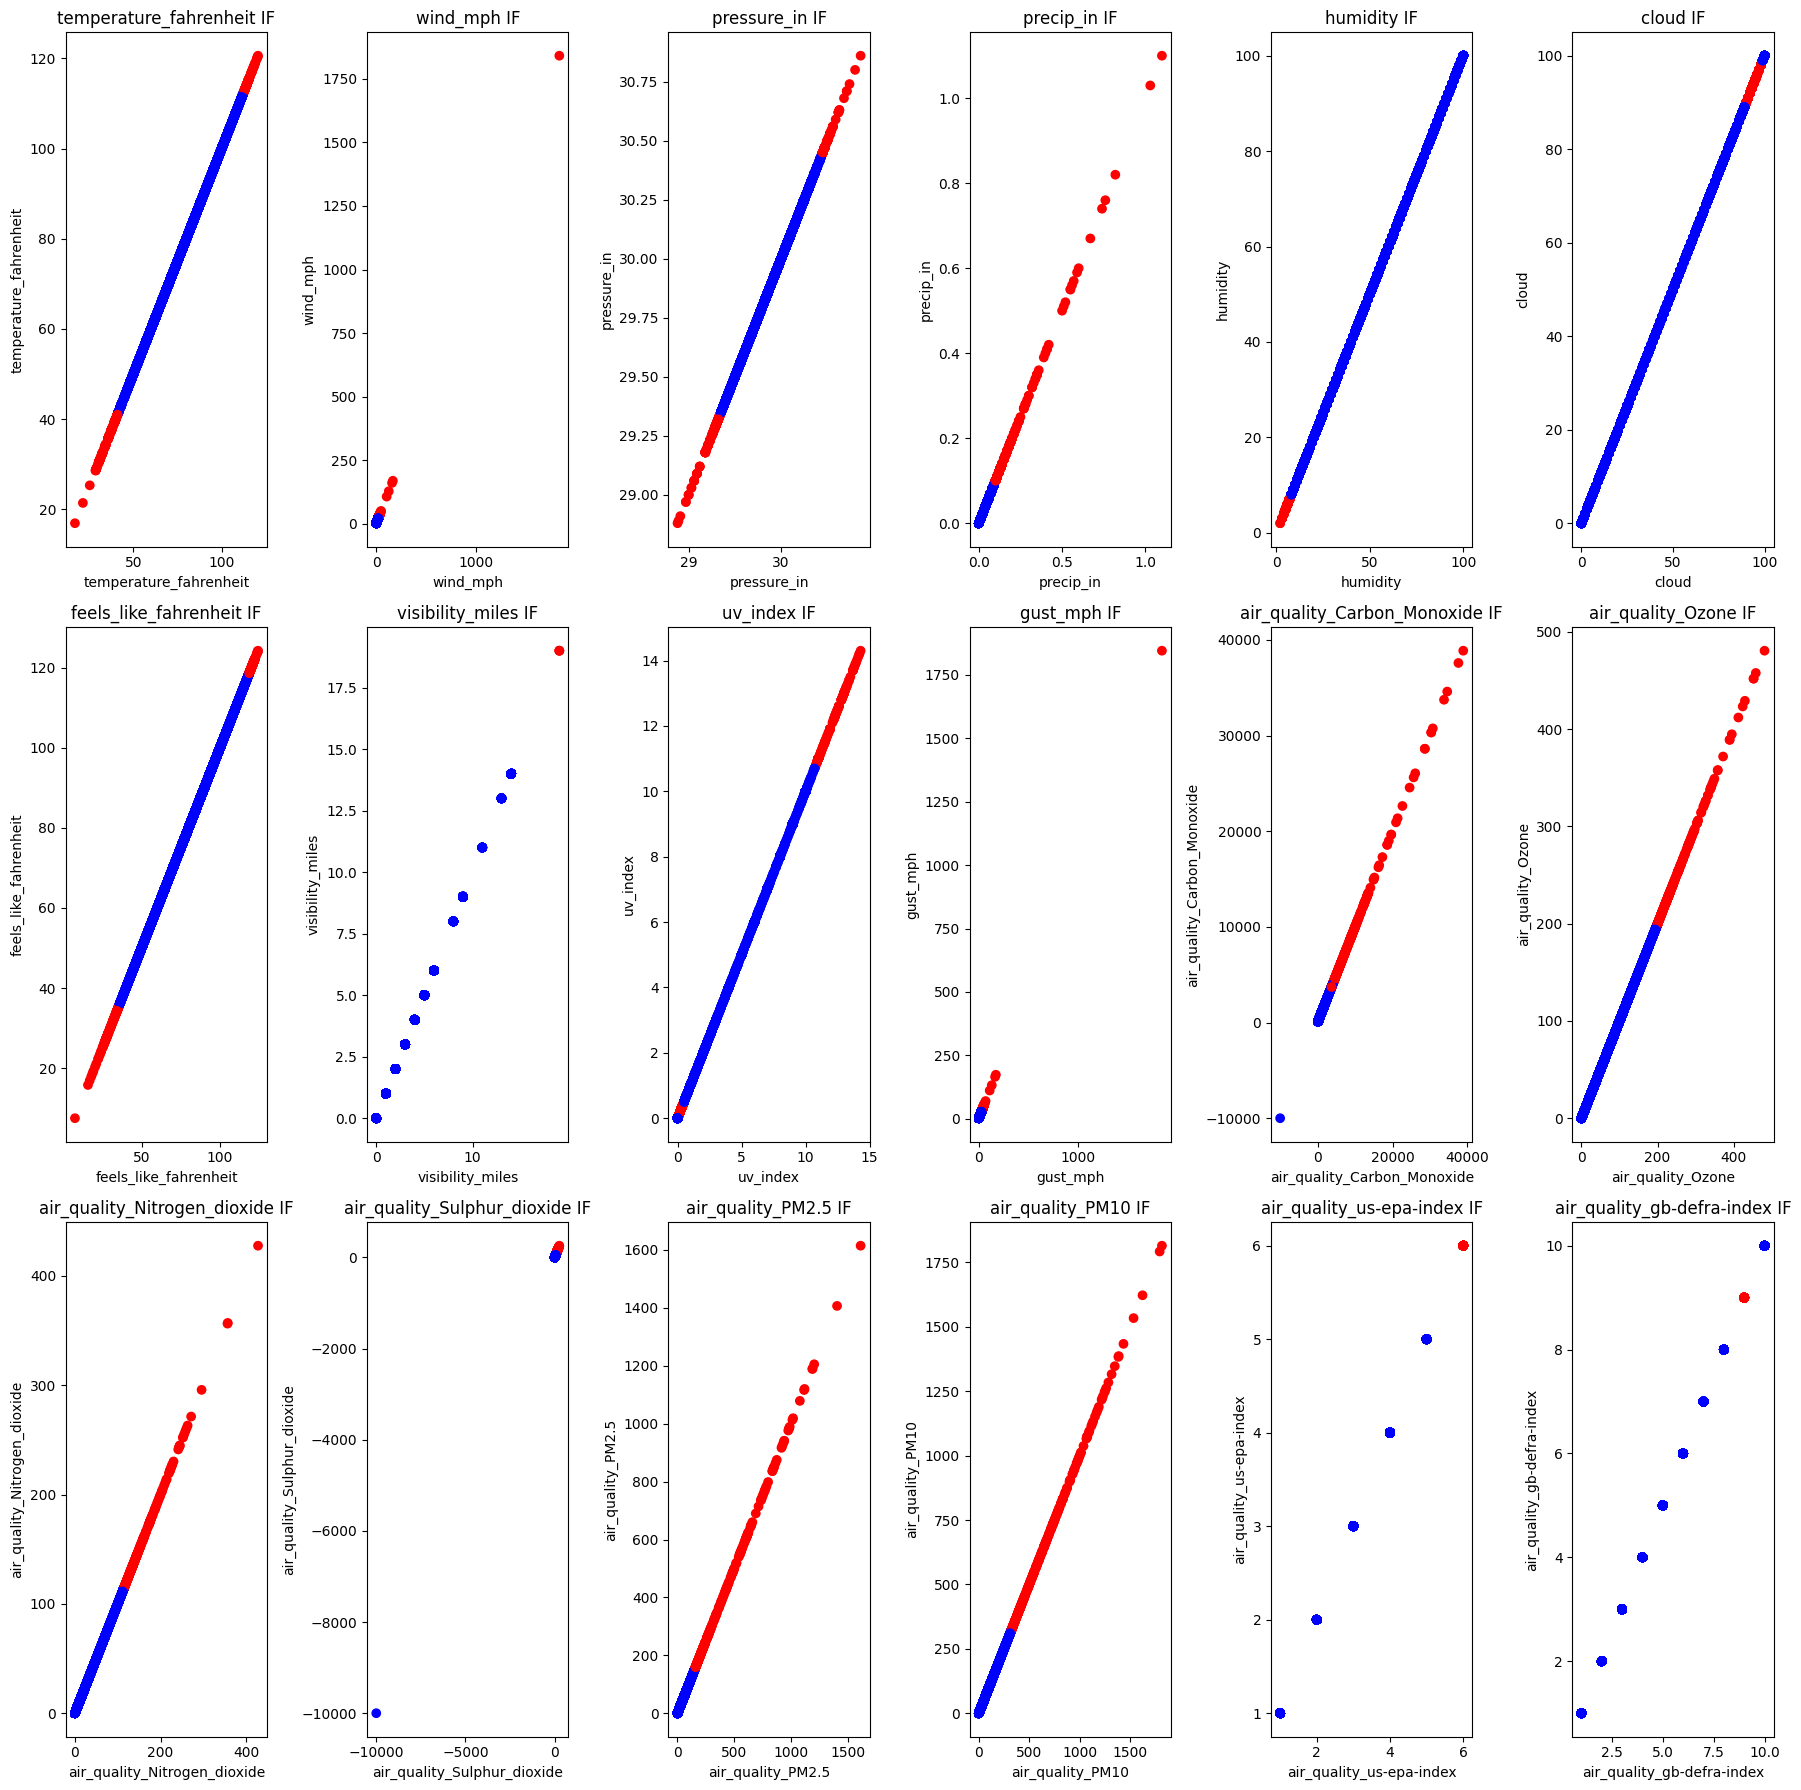

In [14]:
# Selecting numeric features
features = ['temperature_fahrenheit','wind_mph', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'feels_like_fahrenheit',
           'visibility_miles', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
           'air_quality_us-epa-index', 'air_quality_gb-defra-index']

# Create an empty list to store the Isolation Forest models
models = []

# Create and fit an Isolation Forest model for each feature
for feature in features:
    X = data_new[[feature]]
    model = IsolationForest(contamination=0.01)  # Adjust contamination as needed
    model.fit(X)
    models.append(model)

# Create scatter plots for each feature
fig, axes = plt.subplots(nrows=3, ncols = 6, figsize=(18, 18))
# Predict outliers for all features
outlier_labels = []
for i, feature in enumerate(features):
    row = i // 6
    col = i % 6
    X = data_new[[feature]]
    y_pred = models[i].predict(X)
    outlier_labels.append(y_pred)

    # Color-code data points based on outlier status
    colors = ['blue' if label == 1 else 'red' for label in y_pred]

    axes[row, col].scatter(X, X, c=colors)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f"{feature} IF")

plt.tight_layout()
plt.show()

# Create a boolean mask for inliers (True) and outliers (False)
inlier_mask = np.all(np.array(outlier_labels) == 1, axis=0)

In [15]:
# Filter the DataFrame to keep only inliers
X = data_new[features]
data_filtered = X[inlier_mask]
data_filtered.info()
# Now data_filtered contains data without the outliers

<class 'pandas.core.frame.DataFrame'>
Index: 26851 entries, 0 to 29703
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temperature_fahrenheit        26851 non-null  float64
 1   wind_mph                      26851 non-null  float64
 2   pressure_in                   26851 non-null  float64
 3   precip_in                     26851 non-null  float64
 4   humidity                      26851 non-null  int64  
 5   cloud                         26851 non-null  int64  
 6   feels_like_fahrenheit         26851 non-null  float64
 7   visibility_miles              26851 non-null  float64
 8   uv_index                      26851 non-null  float64
 9   gust_mph                      26851 non-null  float64
 10  air_quality_Carbon_Monoxide   26851 non-null  float64
 11  air_quality_Ozone             26851 non-null  float64
 12  air_quality_Nitrogen_dioxide  26851 non-null  float64
 13  air_qu

In [16]:
data_new = data_new[data_new.index.isin(data_filtered.index)]
# Keeping the whole dataset upto date.
data_new.shape
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26851 entries, 0 to 29703
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         26851 non-null  int64  
 1   country                       26851 non-null  object 
 2   location_name                 26851 non-null  object 
 3   latitude                      26851 non-null  float64
 4   longitude                     26851 non-null  float64
 5   timezone                      26851 non-null  object 
 6   last_updated_epoch            26851 non-null  int64  
 7   last_updated                  26851 non-null  object 
 8   temperature_celsius           26851 non-null  float64
 9   temperature_fahrenheit        26851 non-null  float64
 10  condition_text                26851 non-null  object 
 11  wind_mph                      26851 non-null  float64
 12  wind_kph                      26851 non-null  float64
 13  wind_d

## EDA

In this section I am going to uncover the correlation between various features of the dataset and also just get insights into important weather trends across the globe

<ipython-input-17-b9c4cb270bd8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="country", data=data_new_top, order=top_10.index, palette="viridis")


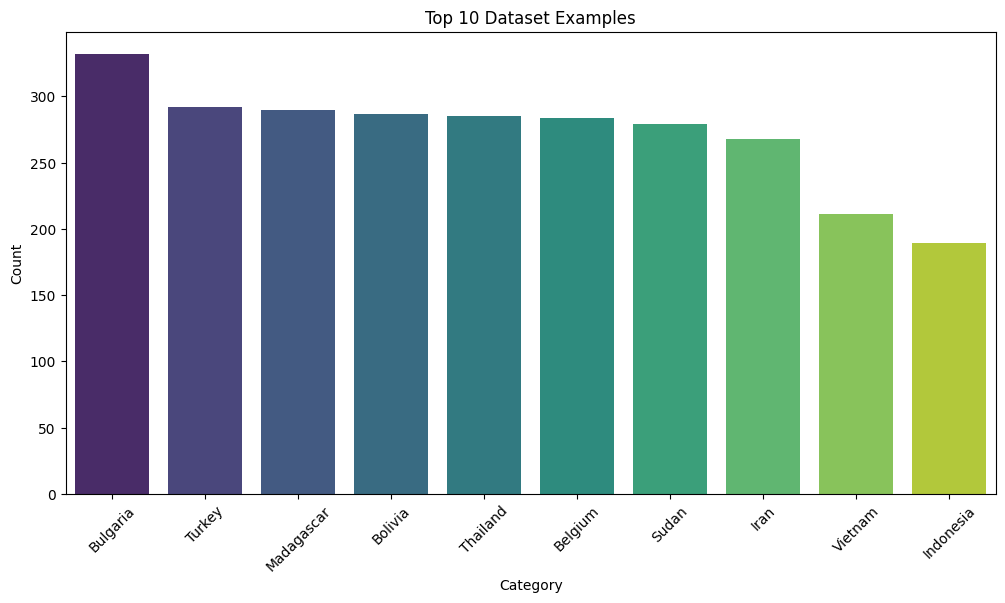

In [17]:
# relation between features is what eda's are
top_10 = data_new["country"].value_counts().nlargest(10)
data_new_top = data_new[data_new["country"].isin(top_10.index)]
plt.figure(figsize=(12, 6))
sns.countplot(x="country", data=data_new_top, order=top_10.index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Dataset Examples")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

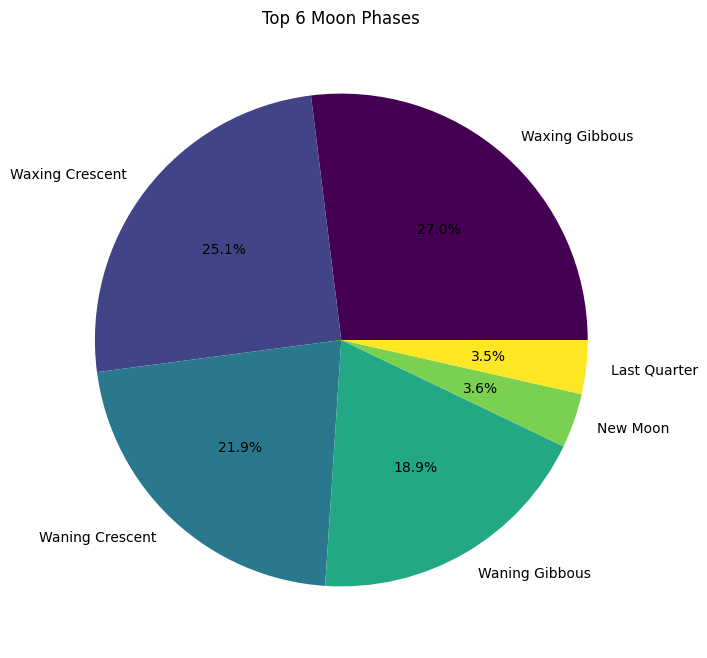

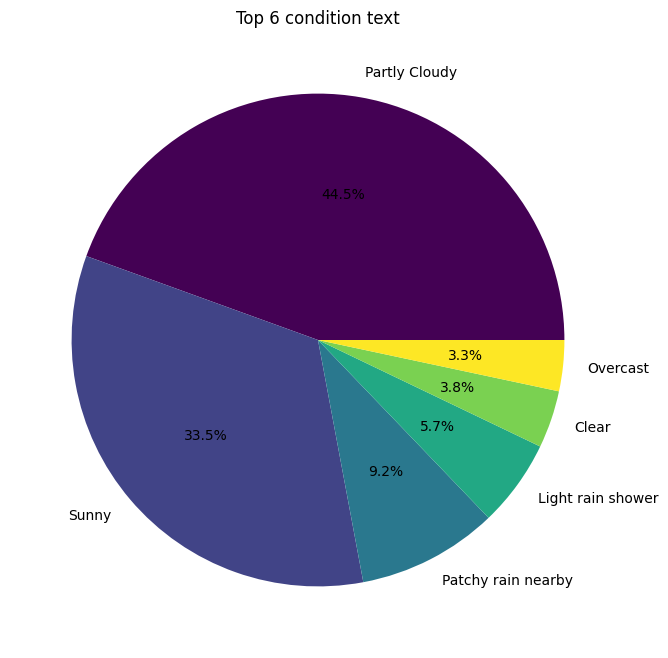

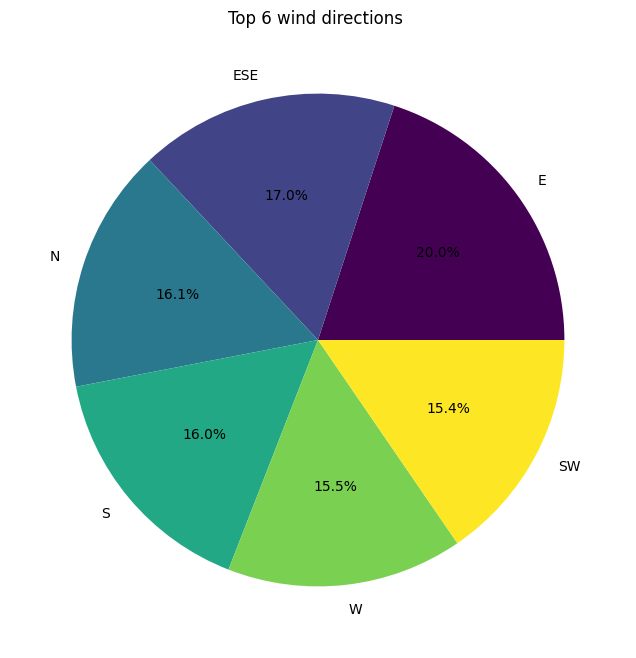

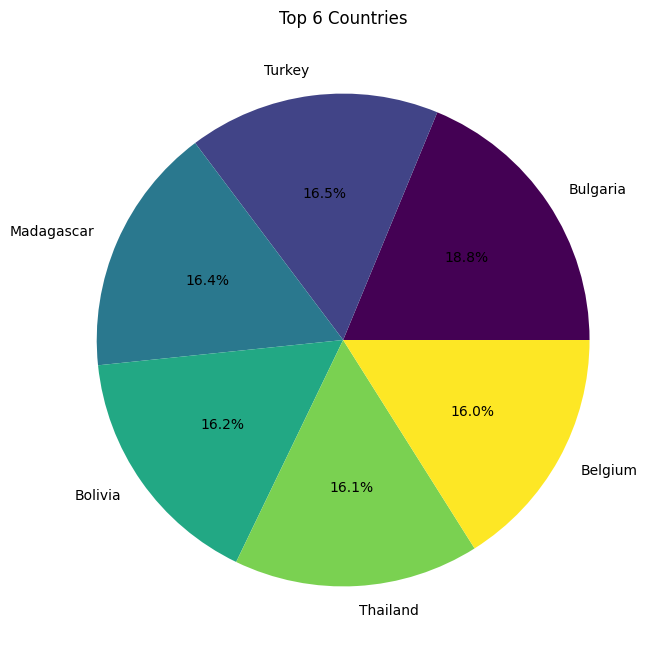

In [18]:
# relation between features is what eda's are
#moon phase
top_6 = data_new["moon_phase"].value_counts().nlargest(6)
top_6.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), colormap="viridis")
plt.title("Top 6 Moon Phases")
plt.ylabel("")  # Remove default label
plt.show()
data_new_top = data_new[data_new["moon_phase"].isin(top_6.index)]
#condition_text
top_6 = data_new["condition_text"].value_counts().nlargest(6)
top_6.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), colormap="viridis")
plt.title("Top 6 condition text")
plt.ylabel("")  # Remove default label
plt.show()
data_new_top = data_new[data_new["condition_text"].isin(top_6.index)]
#wind_direction
top_6 = data_new["wind_direction"].value_counts().nlargest(6)
top_6.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), colormap="viridis")
plt.title("Top 6 wind directions ")
plt.ylabel("")  # Remove default label
plt.show()
data_new_top = data_new[data_new["wind_direction"].isin(top_6.index)]
#country
top_6 = data_new["country"].value_counts().nlargest(6)
top_6.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), colormap="viridis")
plt.title("Top 6 Countries")
plt.ylabel("")  # Remove default label
plt.show()
data_new_top = data_new[data_new["country"].isin(top_6.index)]

In [19]:
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
response = requests.get(url)
if response.status_code == 200:
    world_geojson = response.json()
else:
    print("Error: Could not fetch the GeoJSON file")
m = folium.Map(location=[20, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_geojson,
    name='choropleth',
    data=data_new,
    columns=['country', 'temperature_fahrenheit'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Temperature (°C)',
).add_to(m)
m.save('temperature_choropleth_map.html')
m

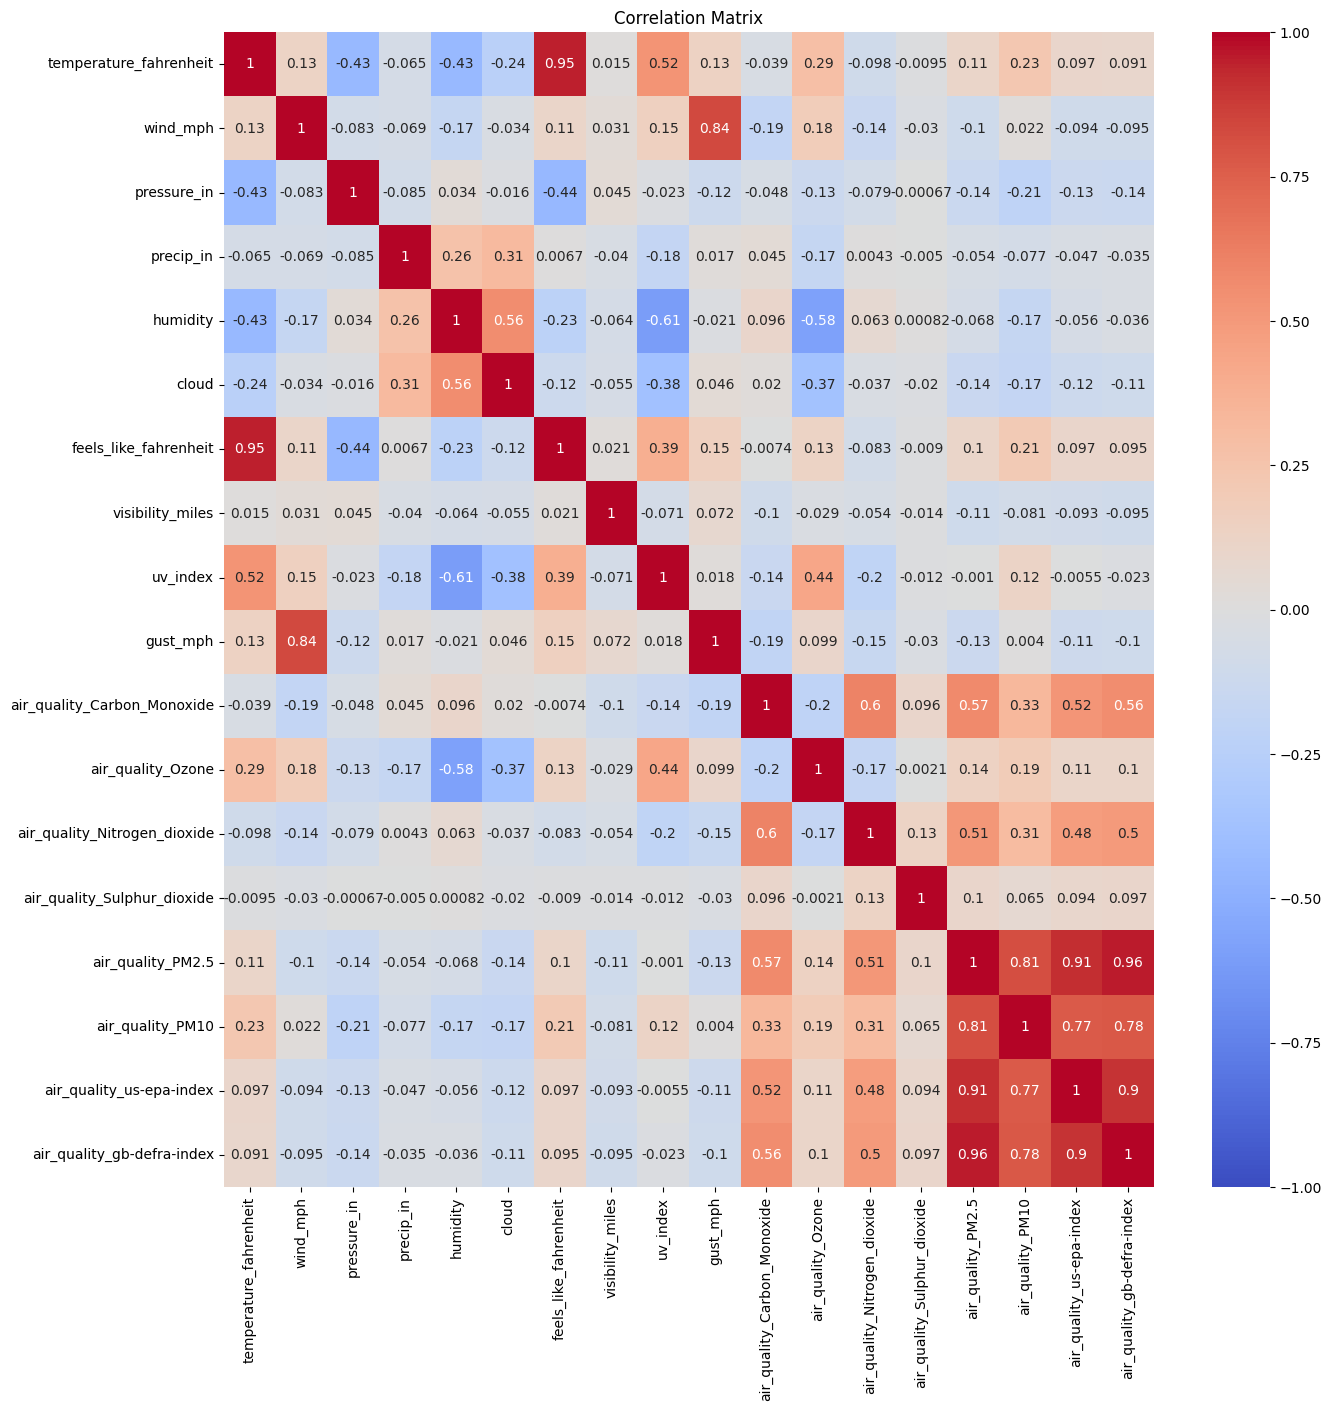

In [20]:
# Calculate the correlation matrix
correlation_matrix = data_filtered.corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

                         feature  importance
0                          cloud    0.467867
1                       uv_index    0.072645
2                       humidity    0.068444
3               visibility_miles    0.050866
4              air_quality_Ozone    0.037287
5         temperature_fahrenheit    0.037020
6          feels_like_fahrenheit    0.032247
7                      precip_in    0.030014
8                    pressure_in    0.028280
9    air_quality_Carbon_Monoxide    0.026511
10  air_quality_Nitrogen_dioxide    0.025828
11                      gust_mph    0.025447
12              air_quality_PM10    0.024266
13             air_quality_PM2.5    0.023661
14   air_quality_Sulphur_dioxide    0.021999
15                      wind_mph    0.021236
16    air_quality_gb-defra-index    0.004079
17      air_quality_us-epa-index    0.002302


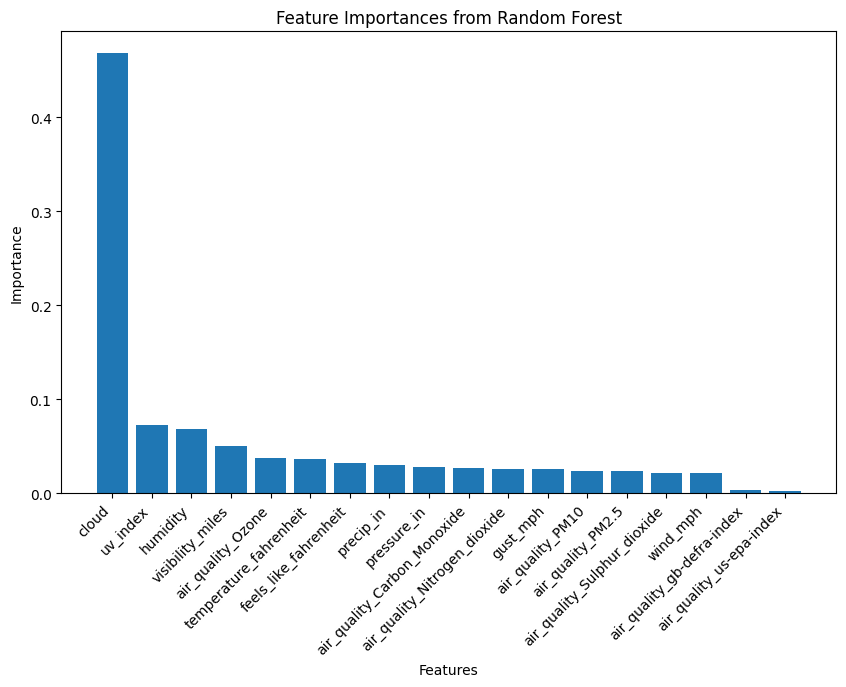

In [21]:
X = data_filtered # Replace 'target_column' with your actual target column name
y = data_new['condition_text']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': X.columns[indices],
                                    'importance': importances[indices]})

# Print feature importances
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

## Model Creation

In [22]:
# Here is the list of important features which I will use to build our models:
forecasting_features = ['temperature_fahrenheit', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'visibility_miles',
                        'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Nitrogen_dioxide']

### Linear Regression

Linear regression models the relationships between at least one explanatory variable and an outcome variable. This flexible analysis allows you to separate the effects of complicated research questions, allowing you to isolate each variable’s role.

Linear regression has two primary purposes—understanding the relationships between variables and prediction:
- The coefficients represent the estimated magnitude and direction (positive/negative) of the relationship between each independent variable and the dependent variable.
- The equation allows you to predict the mean value of the dependent variable given the values of the independent variables that you specify.

Arguably the most important numbers in the output of the regression table are the regression coefficients. Yet, despite their importance, what the heck do they mean?

In a linear regression equation that looks like: $y = b_0 + b_1x_1 + b_2x_2$
- $b_0$ represents the intercept of the line of best fit. It is where the line meets the y-axis.
- $b_1$ and $b_2$ represent the factor that y changes by when $x_1$ or $x_2$ change respectively.

By adjusting these coefficients, we can fit the line to the data points and make predictions.<br><br>

In [28]:
if 'condition_text' in data_new.columns:
    label_encoder = LabelEncoder()
    data_new['condition_encoded'] = label_encoder.fit_transform(data_new['condition_text'])
else:
    raise KeyError("The 'condition' column is not found in the dataset. Please check the column name.")

X = data_filtered # Replace 'target_column' with your actual target column name
y = data_new['condition_encoded']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Get model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Mean Squared Error: 17.127900832324674
R-squared: 0.3225576792505661
Coefficients: [-1.17044846e-01  5.98552698e-02  9.66702439e-01 -2.03096330e+01
 -4.62804716e-02 -2.28882851e-02  8.05664856e-02  5.37626249e-01
  6.09292955e-01 -4.71542399e-02  3.86423243e-04  2.01865986e-03
 -1.19936354e-02  5.92629737e-04 -1.19346700e-03  1.02557005e-02
 -3.36326262e-02 -2.63900154e-01]
Intercept: -13.786475488263338


### Ridge Regression
Ridge Regression is a linear regression technique that adds a penalty term to the cost function. This penalty term is proportional to the square of the magnitude of the model's coefficients. This modification helps to prevent overfitting, especially when dealing with multicollinearity.

When training this model we use a specialized optimization algorithm like gradient descent that basically minimizes the cost function by fine tuning the parameters of the following equation:<br>
$$Cost(w) = MSE(w) + \alpha * ||w||^2$$
Where:
- MSE: Mean squared error
- $\alpha$: Regularization parameter that is up to us to set. This controls the strength of the penalty.
- $||w||^2$: Sum of squared coefficients.

Linear regression doesn't take all these measures to prevent overfitting and regularization of its parameters, which makes ridge regression a great alternative to simply complex models by reducing the impact of less important features.

In [32]:
# Display column names to check for 'condition' column
print(data_new.columns)
# Label Encoding for 'condition' (adjust column name if different)
if 'condition_text' in data_new.columns:
    label_encoder = LabelEncoder()
    data_new['condition_encoded'] = label_encoder.fit_transform(data_new['condition_text'])
else:
    raise KeyError("The 'condition' column is not found in the dataset. Please check the column name.")
# Define features and target
features = ['temperature_fahrenheit','wind_mph', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'feels_like_fahrenheit',
           'visibility_miles', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
           'air_quality_us-epa-index', 'air_quality_gb-defra-index']
X = data_new[features]  # Using the previously defined numeric features
y = data_new['condition_encoded']
# Handle missing values if any
X = X.fillna(X.mean())
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train Ridge Regression Model
ridge = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge.fit(X_train_scaled, y_train)
# Make predictions
y_pred = ridge.predict(X_test_scaled)
# Convert predictions back to categorical
# y_pred_rounded = np.round(y_pred).astype(int)
# y_pred_labels = label_encoder.inverse_transform(y_pred_rounded)
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
# Display some sample predictions
sample_results = pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test[:10]), 'Predicted': y_pred[:10]})
print(sample_results)

Index(['index', 'country', 'location_name', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'condition_encoded'],
      dtype='object')
Mean Squared Error: 17.12790130590209
R-squared Score: 0.32255766051964363
              Actual  Predicted
0      Partly Cloudy  15.533250
1      

### Lasso Regression

Lasso Regression is another regularization technique, similar to Ridge Regression. However, it uses a different penalty term to shrink coefficients towards zero.
$$Cost(w) = MSE(w) + \alpha + ||w||$$
In the above equation we see that $||w||$, the sum of the absolute values of the coefficients, is not squared. This tends to drive some of the coefficents to exactly zero when we use our optimization algorithm, which means that some features are completely weeded out from the prediction process. This is a really efficient way to only keep the features important to our prediction.

Both Ridge and Lasso Regression are powerful techniques for regularizing linear regression models. While Ridge Regression shrinks coefficients, Lasso Regression can drive some coefficients to exactly zero, leading to feature selection. The choice between the two often depends on the specific problem and the desired level of feature selection and model interpretability.

In [30]:
# Display column names to check for 'condition' column
print(data_new.columns)
# Label Encoding for 'condition' (adjust column name if different)
if 'condition_text' in data_new.columns:
    label_encoder = LabelEncoder()
    data_new['condition_encoded'] = label_encoder.fit_transform(data_new['condition_text'])
else:
    raise KeyError("The 'condition' column is not found in the dataset. Please check the column name.")
# Define features and target
features = ['temperature_fahrenheit','wind_mph', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'feels_like_fahrenheit',
           'visibility_miles', 'uv_index', 'gust_mph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
           'air_quality_us-epa-index', 'air_quality_gb-defra-index']
X = data_new[features]  # Using the previously defined numeric features
y = data_new['condition_encoded']
# Handle missing values if any
X = X.fillna(X.mean())
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train Lasso Regression Model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train)
# Make predictions
y_pred = lasso.predict(X_test_scaled)
# Convert predictions back to categorical
# y_pred_rounded = np.round(y_pred).astype(int)
# y_pred_labels = label_encoder.inverse_transform(y_pred_rounded)
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
# Display some sample predictions
sample_results = pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test[:10]), 'Predicted': y_pred[:10]})
print(sample_results)

Index(['index', 'country', 'location_name', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'condition_encoded'],
      dtype='object')
Mean Squared Error: 17.310600255706248
R-squared Score: 0.31533155606204233
              Actual  Predicted
0      Partly Cloudy  15.665878
1     

### Decision Tree Regression

Decision Tree Regression is a supervised learning algorithm that partitions the feature space into smaller regions and predicts a value for each region.

A decision tree has three parts:
- Node: A decision point in the tree where it splits into two different values.
- Branch: A path from node to child node.
- Leaf node: A terminal node that makes a prediction.

Here's how these parts are put together in this algorithm:
- Root Node: Starts with the entire dataset.
- Feature Selection: Selecting the feature and threshold value that allow us to split the data into subsets.
- Recursive partitioning: Features that result in the largest reduction in error are selected recursively to split the data over.
- Once the data is split this way, a new data point traverses the tree based on the feature values, reaching a leaf node. The predicted value is then the average target value of the training data points in that leaf node.

                         feature  importance
0                       uv_index    0.445557
1                          cloud    0.238913
2               visibility_miles    0.079145
3                       humidity    0.035491
4                       gust_mph    0.022108
5              air_quality_Ozone    0.019718
6               air_quality_PM10    0.019393
7          feels_like_fahrenheit    0.019144
8   air_quality_Nitrogen_dioxide    0.018217
9         temperature_fahrenheit    0.017287
10                      wind_mph    0.017225
11                     precip_in    0.015947
12   air_quality_Carbon_Monoxide    0.014862
13                   pressure_in    0.013816
14   air_quality_Sulphur_dioxide    0.011809
15             air_quality_PM2.5    0.008498
16    air_quality_gb-defra-index    0.001734
17      air_quality_us-epa-index    0.001135


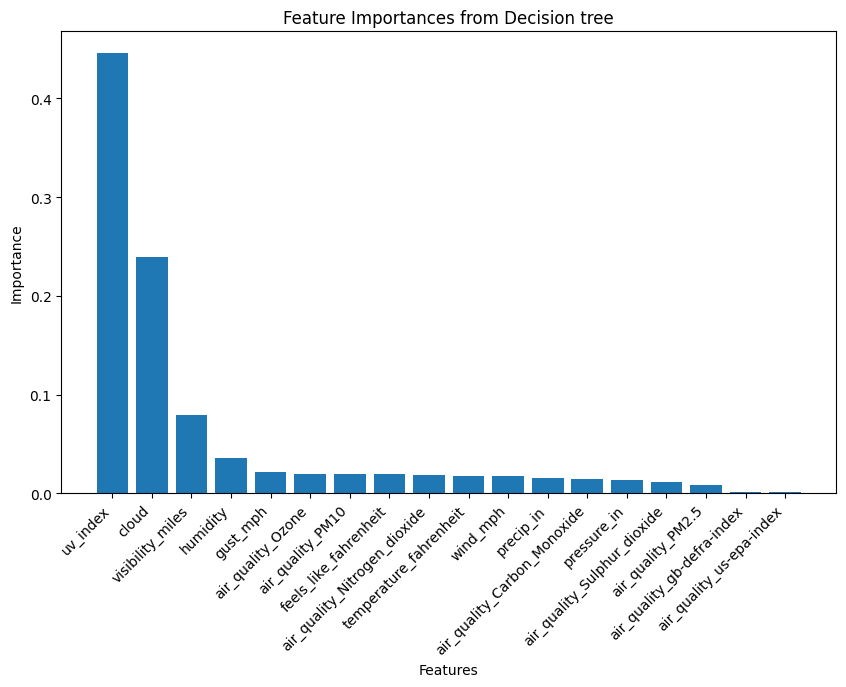

Mean Squared Error: 10.32210016756656
R^2 Score: 0.5917405430484769
RSE: 0.041238002932182674


In [33]:
X = data_filtered # Replace 'target_column' with your actual target column name
label_encoder = LabelEncoder()
data_new['condition_text'] = label_encoder.fit_transform(data_new['condition_text'])
y = data_new['condition_text']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Random Forest model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
# Get feature importances
importances = dt.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': X.columns[indices],
                                    'importance': importances[indices]})
# Print feature importances
print(feature_importance_df)
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Decision tree')
plt.xticks(rotation=45, ha='right')
plt.show()
y_predicted = dt.predict(X_test) # actual prediction on unseen data
# label encoding
MSE = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error:", MSE)
r2 = r2_score(y_test, y_predicted)
print("R^2 Score:", r2)
rse = np.sum((y_test - y_predicted) ** 2) / np.sum(y_test ** 2)
print("RSE:", rse)

### Random Forest Regressor

Random Forest Regression is a versatile machine learning algorithm that combines multiple decision trees to make more accurate predictions. It's a powerful technique that often outperforms single decision trees, especially when dealing with complex datasets. Here's how it works:
- You start by creating multiple decision trees, each trained on a random subset of the data and each has a random subset of features selected at each node.
- Each decision tree makes a prediction n a new data point.
- Final prediction is the average of all predictions

                         feature  importance
0                          cloud    0.467867
1                       uv_index    0.072645
2                       humidity    0.068444
3               visibility_miles    0.050866
4              air_quality_Ozone    0.037287
5         temperature_fahrenheit    0.037020
6          feels_like_fahrenheit    0.032247
7                      precip_in    0.030014
8                    pressure_in    0.028280
9    air_quality_Carbon_Monoxide    0.026511
10  air_quality_Nitrogen_dioxide    0.025828
11                      gust_mph    0.025447
12              air_quality_PM10    0.024266
13             air_quality_PM2.5    0.023661
14   air_quality_Sulphur_dioxide    0.021999
15                      wind_mph    0.021236
16    air_quality_gb-defra-index    0.004079
17      air_quality_us-epa-index    0.002302


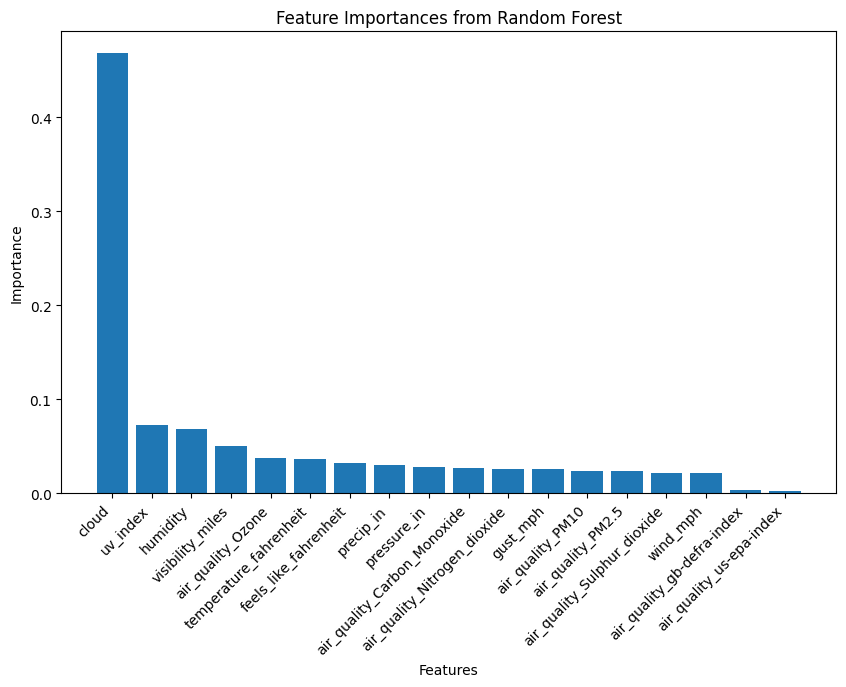

Mean Squared Error: 7.197356172035003
R^2 Score: 0.7153303422190651
RSE: 0.028754283538048084


In [34]:
X = data_filtered # Replace 'target_column' with your actual target column name
label_encoder = LabelEncoder()
data_new['condition_text'] = label_encoder.fit_transform(data_new['condition_text'])
y = data_new['condition_text']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': X.columns[indices],
                                    'importance': importances[indices]})
# Print feature importances
print(feature_importance_df)
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()
y_predicted = rf.predict(X_test) # actual prediction on unseen data
# label encoding
MSE = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error:", MSE)
r2 = r2_score(y_test, y_predicted)
print("R^2 Score:", r2)
rse = np.sum((y_test - y_predicted) ** 2) / np.sum(y_test ** 2)
print("RSE:", rse)

### CatBoost

CatBoost is a powerful gradient boosting library that excels at handling categorical data and offers several key advantages over other gradient boosting methods.

Gradient Boosting:
- CatBoost builds upon the foundation of gradient boosting. This iterative process involves constructing a sequence of weak learners (typically decision trees) where each subsequent tree corrects the errors made by the previous ones.
- The goal is to minimize a loss function (e.g., mean squared error, log-loss) by iteratively adding new trees that focus on the areas where the previous model made the most significant errors.

Handling Categorical Features:
- CatBoost's key innovation lies in its ability to efficiently handle categorical features without extensive preprocessing.
- It employs a novel encoding scheme that considers the target variable's statistics when ordering the categories. This "target statistics" approach helps capture the relationship between categorical features and the target more effectively.

Symmetric Trees:
- CatBoost utilizes symmetric trees as its base learners. These trees are balanced and have a consistent structure across all levels. This approach can lead to faster training and better performance in some cases.


In [39]:
X = data_filtered[forecasting_features]  # Replace 'target_variable' with your actual target column name
y = data_new['condition_text']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# le = LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_test_encoded = le.transform(y_test)

# Identify categorical features (if any)
cat_features = list(X_train.select_dtypes(include=['category', 'object']).columns)

# Create and train the CatBoostRegressor
cat_model = CatBoostRegressor(
    iterations=1000,  # Adjust as needed
    learning_rate=0.1,  # Adjust as needed
    depth=6,          # Adjust as needed
    random_seed=42,
    cat_features=cat_features  # Specify categorical features
)
# Train the CatBoost model using the encoded target variable
cat_model.fit(X_train, y_train_encoded, eval_set=(X_test, y_test), verbose=100)
# Make predictions
y_pred = cat_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

0:	learn: 4.5257664	test: 4.8168912	best: 4.8168912 (0)	total: 13.5ms	remaining: 13.5s
100:	learn: 2.1820608	test: 2.6133329	best: 2.6133329 (100)	total: 1.04s	remaining: 9.25s
200:	learn: 2.0406178	test: 2.5539491	best: 2.5524372 (193)	total: 1.68s	remaining: 6.67s
300:	learn: 1.9545551	test: 2.5385994	best: 2.5385994 (300)	total: 2.01s	remaining: 4.67s
400:	learn: 1.8892096	test: 2.5321856	best: 2.5313314 (386)	total: 2.33s	remaining: 3.48s
500:	learn: 1.8288870	test: 2.5296599	best: 2.5291025 (451)	total: 2.64s	remaining: 2.63s
600:	learn: 1.7728028	test: 2.5253748	best: 2.5247828 (558)	total: 2.96s	remaining: 1.97s
700:	learn: 1.7234258	test: 2.5245106	best: 2.5232482 (689)	total: 3.27s	remaining: 1.39s
800:	learn: 1.6780042	test: 2.5248136	best: 2.5219712 (731)	total: 3.58s	remaining: 889ms
900:	learn: 1.6340292	test: 2.5246243	best: 2.5219712 (731)	total: 3.9s	remaining: 428ms
999:	learn: 1.5900471	test: 2.5255960	best: 2.5219712 (731)	total: 4.19s	remaining: 0us

bestTest = 2.52